# 概率论与数理统计  


1. 导入必要的包，multinomial用于产生服从多项分布的样本

In [3]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

2. 以掷骰子为例，构造一个概率向量，即各个实验结果出现的概率。  

In [23]:
fair_probs = torch.ones((1, 6)) / 6
counts = multinomial.Multinomial(10, fair_probs) # 创建一个可产生10个样本的多项分布的类
samples = counts.sample((5,)) # 进行五次实验
samples_counts = samples.cumsum(dim=0)
print(samples) # 5*1*6
print(samples_counts) # 5*1*6
print(samples_counts.sum(dim=2, keepdim=True)) # 5*1*1
estimates = samples_counts / samples_counts.sum(dim=2, keepdim=True) # 5*1*6
print(estimates)

tensor([[[1., 1., 0., 4., 1., 3.]],

        [[4., 0., 1., 2., 0., 3.]],

        [[0., 0., 2., 2., 0., 6.]],

        [[1., 3., 2., 0., 4., 0.]],

        [[2., 1., 0., 1., 5., 1.]]])
tensor([[[ 1.,  1.,  0.,  4.,  1.,  3.]],

        [[ 5.,  1.,  1.,  6.,  1.,  6.]],

        [[ 5.,  1.,  3.,  8.,  1., 12.]],

        [[ 6.,  4.,  5.,  8.,  5., 12.]],

        [[ 8.,  5.,  5.,  9., 10., 13.]]])
tensor([[[10.]],

        [[20.]],

        [[30.]],

        [[40.]],

        [[50.]]])
tensor([[[0.1000, 0.1000, 0.0000, 0.4000, 0.1000, 0.3000]],

        [[0.2500, 0.0500, 0.0500, 0.3000, 0.0500, 0.3000]],

        [[0.1667, 0.0333, 0.1000, 0.2667, 0.0333, 0.4000]],

        [[0.1500, 0.1000, 0.1250, 0.2000, 0.1250, 0.3000]],

        [[0.1600, 0.1000, 0.1000, 0.1800, 0.2000, 0.2600]]])


3. 我们也可以看到这些概率如何随着时间的推移收敛到真实概率。让我们进行500组实验，每组抽取10个样本。  

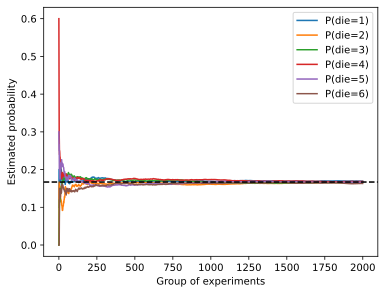

In [34]:
samples = counts.sample((2000,))
samples_counts = samples.cumsum(dim=0)
estimates = samples_counts / samples_counts.sum(dim=2, keepdim=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, 0, i].numpy(), 
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Group of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()